In [87]:
# ML Project

# headers
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
print("hello")

raw_data = pd.read_csv("spotify-2023.csv", skipinitialspace = True)
# raw_data.drop(raw_data['in_shazam_charts'], axis=1, inplace=True)
print(raw_data.head())




hello
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703         

In [89]:
print(raw_data.info())

# let's check for missing values
missing_values = raw_data.isna().sum()
print(missing_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [90]:
# it seems that there are some blank values in the shazam_charts column.
# let's check how many values have a value 0

zero_counts = (raw_data == 0).sum()
zero_counts 

track_name                0
artist(s)_name            0
artist_count              0
released_year             0
released_month            0
released_day              0
in_spotify_playlists      0
in_spotify_charts       405
streams                   0
in_apple_playlists       23
in_apple_charts         100
in_deezer_playlists       0
in_deezer_charts        558
in_shazam_charts          0
bpm                       0
key                       0
mode                      0
danceability_%            0
valence_%                 0
energy_%                  0
acousticness_%           60
instrumentalness_%      866
liveness_%                0
speechiness_%             0
dtype: int64

In [110]:
max_values_spot = raw_data['in_spotify_charts'].max()
max_values_deez = raw_data['in_deezer_charts'].max()
max_values_app = raw_data['in_apple_charts'].max()
print(max_values_spot, max_values_deez, max_values_app)

147 58 275


In [92]:
# print out rows that have 0 in Apple, Spotify, AND Deezer charts. That is bad.

# a mirror of all of the records
# the value is false if it doesn't meet the condition
# the value is true otherwise
all_zero_chart_rankings = ((raw_data['in_spotify_charts'] == 0) & (raw_data['in_deezer_charts'] == 0) & (raw_data['in_apple_charts'] == 0))

# print(all_zero_chart_rankings)
print((all_zero_chart_rankings == False).sum())

# only print rows of raw_data where the matching row from all_zero_chart_rankings is True
filtered_df = raw_data[all_zero_chart_rankings]
# print(filtered_df)  # 0 rows
print(filtered_df['in_spotify_charts'].sum())  # 0'])
print(filtered_df['in_deezer_charts'].sum())  # 0'])
print(filtered_df['in_apple_charts'].sum())  # 0']) 


# There are 65 records in total that have 0 in all three charts.

# We can try to weigh charts with the total missing values for each chart.
# We can try to 

888
0
0
0


In [93]:

some_zero_chart_rankings = ((raw_data['in_spotify_charts'] == 0) | (raw_data['in_deezer_charts'] == 0) | (raw_data['in_apple_charts'] == 0))
print((all_zero_chart_rankings == 0).sum())
filtered_df = raw_data[some_zero_chart_rankings]
print(filtered_df)  # 0 rows
print((filtered_df['in_spotify_charts'] == 0).sum())  # 0'])
print((filtered_df['in_deezer_charts']== 0).sum())  # 0'])
print((filtered_df['in_apple_charts'] == 0).sum())  # 0']) 
 
# There are 627(includes 65 records that have no ranking) records in total that are missing at least one ranking from the Spotify, Deezer, or Apple charts.

# TODO: We did not include Shazam charts in this analysis. We should include Shazam charts in this analysis.
# There are no MISSING values in Spotify, Deezer, Apple charts, BUT there are 50 missing values in Shazam charts so we have to remember to add those in

888
                                  track_name                artist(s)_name  \
29   Dance The Night (From Barbie The Album)                      Dua Lipa   
47                               Die For You                    The Weeknd   
53              (It Goes Like) Nanana - Edit                     Peggy Gou   
62   Left and Right (Feat. Jung Kook of BTS)  Charlie Puth, BTS, Jung Kook   
66                                     Karma                  Taylor Swift   
..                                       ...                           ...   
947                            The Great War                  Taylor Swift   
948                             My Mind & Me                  Selena Gomez   
949                Bigger Than The Whole Sky                  Taylor Swift   
950                     A Veces (feat. Feid)            Feid, Paulo Londra   
951                            En La De Ella            Feid, Sech, Jhayco   

     artist_count  released_year  released_month  released_

In [94]:
"""
Add season column as a new feature
"""
print(len(raw_data))
seasons = []
# print(len(raw_data.iterrows()))
for index,row in raw_data.iterrows():
    if row['released_month'] in [12,1,2]:
        seasons.append('winter')
    elif row['released_month'] in [3,4,5]:
        seasons.append('spring')
    elif row['released_month'] in [6,7,8]:
        seasons.append('summer')
    elif row['released_month'] in [9,10,11]:
        seasons.append('fall')
    else:
        seasons.append('unknown')

raw_data['season'] = seasons
print(raw_data['season'])
print(raw_data['season'].value_counts())

953
0      summer
1      spring
2      summer
3      summer
4      spring
        ...  
948      fall
949      fall
950      fall
951      fall
952      fall
Name: season, Length: 953, dtype: object
season
spring    280
winter    270
fall      209
summer    194
Name: count, dtype: int64


In [95]:
"""
Add ranking column
"""
raw_data['stream_ranking'] = raw_data['streams'].rank(ascending=False).astype(int)
print((raw_data[['track_name', 'artist(s)_name', 'streams', 'stream_ranking']]).sort_values(by='stream_ranking').head(20))

                                        track_name  \
55                                 Blinding Lights   
179                                   Shape of You   
86                               Someone You Loved   
620                                   Dance Monkey   
41   Sunflower - Spider-Man: Into the Spider-Verse   
162                                      One Dance   
84                       STAY (with Justin Bieber)   
140                                       Believer   
725                                         Closer   
48                                         Starboy   
138                                        Perfect   
71                                      Heat Waves   
14                                       As It Was   
693                                          Se��o   
324                           Say You Won't Let Go   
128                           lovely - Bonus Track   
127                               Watermelon Sugar   
407                         

In [96]:
"""Add average streams per year column, this should be helpful on comparing songs that were released in different years, but not overall ranking"""
""""Now newers songs that haven't had as much time to accumulate strings get more presence in the ranking."""""
raw_data['average_streams_per_year'] = raw_data['streams'] / (2024 - raw_data['released_year'])
pd.options.display.float_format = '{:.2f}'.format
print((raw_data[['track_name', 'released_year', 'streams', 'average_streams_per_year']]).sort_values(by='average_streams_per_year', ascending=False).head(20))

                                track_name  released_year     streams  \
12                                 Flowers           2023  1316855716   
14                               As It Was           2022  2513188493   
84               STAY (with Justin Bieber)           2021  2665343922   
55                         Blinding Lights           2019  3703895074   
6                          Ella Baila Sola           2023   725980112   
133  Shakira: Bzrp Music Sessions, Vol. 53           2023   721975598   
87                         Me Porto Bonito           2022  1440757818   
74   Quevedo: Bzrp Music Sessions, Vol. 52           2022  1356565093   
71                              Heat Waves           2020  2557975762   
192                       Titi Me Pregunt�           2022  1264310836   
513                               good 4 u           2021  1887039593   
535                        drivers license           2021  1858144199   
34                                     TQG         

In [97]:
""""Bin bpm into 3 categories: slow, medium, fast(Thresholds were determined by general bpm differentiation across genres)"""
bpm_col = raw_data['bpm']
bpm_bins = [0, 105, 130, 300]
bpm_labels = ['slow', 'medium', 'fast']
raw_data['bpm_category'] = pd.cut(x =bpm_col, bins=bpm_bins, labels=bpm_labels)


# DELETE raw_data['bpm'] ?? 
# raw_data.drop(['bpm'], axis=1, inplace=True)
print(raw_data['bpm_category'].value_counts())

bpm_category
fast      338
slow      308
medium    307
Name: count, dtype: int64


In [98]:
'''Spotify charts: binary label, 1 for in charts, 0 for not in charts
This can be used as an alternative class label.
We are using this label because we are trying to predict whether a song will be charted on Spotify
'''

# all zero values indicate that a song was not charted

# create a new column called charted_on_spotify

charted_on_spotify = raw_data['in_spotify_charts'] != 0
raw_data['charted_on_spotify'] = charted_on_spotify
print(raw_data['charted_on_spotify'].value_counts())

charted_on_spotify
True     548
False    405
Name: count, dtype: int64


In [99]:
'''Apple charts: binned, 1-100, 101-200, 201-275, 276+'''
'''This could also be used as a class label, or a feature'''

# we are assuming that every row with an "in_apple_charts" value of 0 is a song that didn't make the top 275 charts
# initially the bins were 1-100, 101-200, 201-275, 276+ and the result is:
'''1-100      677
   101-200    163
   276+       100
   201-275     13'''

# Because the 1-100 bin has the most values, we are going to change the bins to 1-50, 51-100, 101-200, 201-275, 276+
# So that the bins are less skewed
apple_chart_bins = [-1, 0, 51, 101, 201, 276]
apple_chart_labels = [ '276+', '1-50', '51-100', '101-200', '201-275']
raw_data['apple_chart_category'] = pd.cut(x = raw_data['in_apple_charts'], bins=apple_chart_bins, labels=apple_chart_labels)

print(raw_data['apple_chart_category'].value_counts())

# one-hot encode the apple_chart_category column

raw_data = pd.get_dummies(raw_data, columns=['apple_chart_category'])
print(raw_data.head())

apple_chart_category
1-50       439
51-100     243
101-200    158
276+       100
201-275     13
Name: count, dtype: int64
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   



In [100]:
'''We have decided to fill in the missing values of the 'key' column based on
the probability distribution of the 'keys' that exist in the data set.'''

keys = raw_data['key'].dropna().unique()
counts = raw_data['key'].value_counts()
sums = raw_data['key'].value_counts().sum()
counts = counts / sums
for i in range(1,len(keys)):
    counts.iloc[i] = counts.iloc[i] + counts.iloc[i-1]

print(counts)

import random
# random number between 0 and 1

# for each record with column value ['key'] that is n/a, choose a random number bewteen 0 and 1
# set the key value to the corresponding key value in counts

print('before', raw_data['key'].value_counts())

def get_key(num):
    for i in range(len(counts)):
        if num < counts.iloc[i]:
            return keys[i]
    return keys[len(keys)-1]

new_data_with_key_filled_in = raw_data['key'].apply(lambda x: get_key(random.uniform(0,1)) if pd.isna(x) else x)

# print out number of missing values in key column
print('after', new_data_with_key_filled_in.value_counts())



key
C#   0.14
G    0.25
G#   0.36
F    0.46
B    0.56
D    0.65
A    0.74
F#   0.82
E    0.90
A#   0.96
D#   1.00
Name: count, dtype: float64
before key
C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: count, dtype: int64
after key
C#    134
F     103
G     103
G#     95
B      90
F#     90
D      89
A      82
E      68
A#     63
D#     36
Name: count, dtype: int64


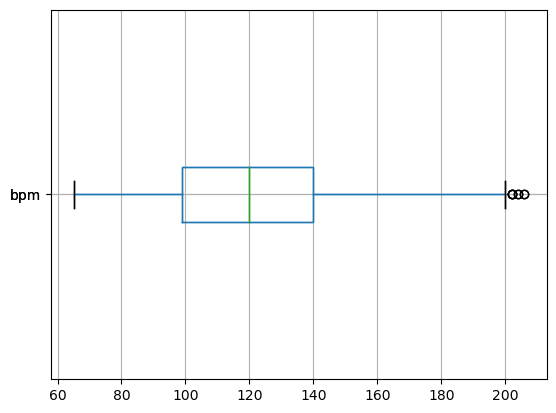

In [123]:
'''Explore BPM data'''
import matplotlib.pyplot as plt

raw_data.boxplot(column='bpm', vert=False)
plt.show()
raw_data['bpm'].describe()

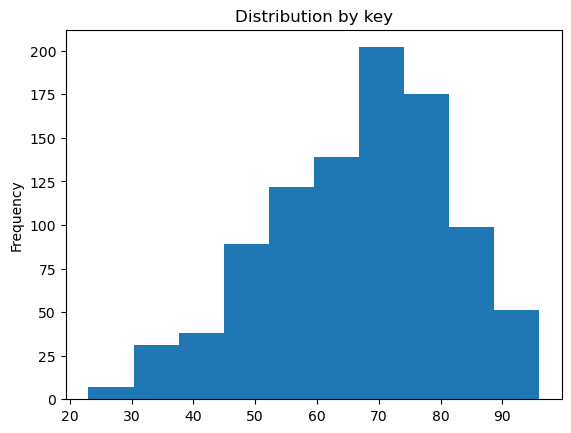

count   953.00
mean     66.97
std      14.63
min      23.00
25%      57.00
50%      69.00
75%      78.00
max      96.00
Name: danceability_%, dtype: float64

In [129]:
raw_data['danceability_%'].plot(kind='hist', title='Distribution by key')
plt.show()
raw_data['danceability_%'].describe()